<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/GAM_sku_v10_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygam


In [2]:
import pandas as pd
df_org = pd.read_excel('/content/Приволжский федеральный округ_X5_Дискаунтер_Сыр полутвёрдый.xlsx')

pd.options.display.float_format = '{:.10f}'.format

In [3]:
df_org

,Month,Year,Sku_name,Analytic1,Articul8,Brand,PRICE_PER_UNIT,SALES_VOL,SHARE_VOL_PROMO,SHARE_VOL
0,1,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1180.7812698413,31.5000000000,0.4553333333,0.0000800978
1,2,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1258.6229314421,25.3800000000,0.2653664303,0.0000698244
2,3,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1342.6359649123,13.6800000000,0.1445906433,0.0000422256
3,4,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1267.7443502820,21.2400000000,0.4506120527,0.0000664491
4,5,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1236.0555555586,3.2400000000,0.5783950617,0.0000101936
...,...,...,...,...,...,...,...,...,...,...
2716,10,2023,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,200 г,Сливочный,Брест Литовск,790.6225308054,15725.3500000000,0.5749440976,0.0320313920
2717,11,2022,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,200 г,Сливочный,Брест Литовск,835.3173476147,10102.6800000002,0.7960359095,0.0215059321
2718,11,2023,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,200 г,Сливочный,Брест Литовск,707.5568156232,47919.1399999998,0.8074893569,0.0986656467
2719,12,2022,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,200 г,Сливочный,Брест Литовск,816.2767942531,15439.2099999997,0.8405587202,0.0309723113


In [4]:
df_org_top_25 = df_org.groupby(['Sku_name'])['SALES_VOL'].sum()
sku_top_25=df_org_top_25.sort_values(ascending=False).head(25)
lst_top_sku_25 = sku_top_25.index.tolist()
lst_top_sku_25

['Сыр полутвёрдый Село Зеленое Сметанковый Флоу-пак 200 г 50,0%',
 'Сыр полутвёрдый Брест Литовск Монастырский Флоу-пак 200 г 45,0%',
 'Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%',
 'Сыр полутвёрдый Брест Литовск Сливочный Флоу-пак 200 г 50,0%',
 'Сыр полутвёрдый Брест Литовск Российский Флоу-пак 200 г 50,0%',
 'Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%',
 'new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new',
 'Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%',
 'Сыр полутвёрдый Пестравка Сливочный Флоу-пак 200 г 50,0%',
 'Сыр полутвёрдый Пестравка Российский Флоу-пак 200 г 50,0%',
 'Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%',
 'Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%',
 'Сыр полутвёрдый Брест Литовск Маасдам Флоу-пак 200 г 45,0%',
 'Сыр полутвёрдый Ламбер Флоу-пак 230 г 50,0%',
 'Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%',
 'Сыр полутвёрдый Белебеевский Голландский 

In [5]:
df_top_sku_2024_30 = df_org[(df_org['Year'] == 2024) & (df_org['Month'].isin([1, 2, 3]))].groupby(['Sku_name'])['SALES_VOL'].sum()

sku_top_30=df_top_sku_2024_30.sort_values(ascending=False).head(30)
lst_top_sku_30_2024 = sku_top_30.index.tolist()
lst_top_new_sku_2024=[i for i in lst_top_sku_30_2024 if i not in lst_top_sku_25]
lst_top_new_sku_2024

['Сыр полутвёрдый Кезский сырзавод Тильзитер Флоу-пак 200 г 50,0%',
 'Сыр полутвёрдый Сыробогатов Королевский стандарт Топленое молоко Флоу-пак 180 г 40,0%',
 'Сыр полутвёрдый Кезский сырзавод Гауда Флоу-пак 200 г 40,0%',
 'Сыр полутвёрдый Бэрэкэтле Традиционный Флоу-пак 200 г 45,0%',
 'Сыр полутвёрдый Эконива Гауда Флоу-пак 160 г 45,0%',
 'Сыр полутвёрдый Село Зеленое Тильзитер Флоу-пак 400 г 50,0%',
 'Сыр полутвёрдый Кезский сырзавод Степной Флоу-пак 200 г 45,0%',
 'Сыр полутвёрдый Пестравка Классический Флоу-пак 200 г 45,0%',
 'Сыр полутвёрдый Кезский сырзавод Российский Флоу-пак 200 г 50,0%',
 'Сыр полутвёрдый Эконива Тильзитер Флоу-пак 400 г 50,0%']

In [6]:
df_org_train_top_25 = df_org[(df_org['Year'] < 2024) & (df_org['Sku_name'].isin(lst_top_sku_25))].copy()
df_org_train_top_25

len(df_org_train_top_25['Sku_name'].unique())

25

In [7]:
df_org_test_top_25 = df_org[(df_org['Year'] == 2024) & (df_org['Sku_name'].isin(lst_top_new_sku_2024+lst_top_sku_25)) & (df_org['Month'].isin([1,2,3]))].copy()
df_org_test_top_25
len(df_org_test_top_25['Sku_name'].unique())

32

In [8]:
df_org_train = df_org_train_top_25.copy()
df_org_test = df_org_test_top_25.copy()

analit_train= df_org_train['Analytic1'].unique().tolist()
articul_train= df_org_train['Articul8'].unique().tolist()
brand_train= df_org_train['Brand'].unique().tolist()
filtered_df_test = df_org_test[
    (df_org_test['Analytic1'].isin(analit_train)) &
    (df_org_test['Articul8'].isin(articul_train)) &
    (df_org_test['Brand'].isin(brand_train))
]
filtered_df_test.reset_index(drop=True, inplace=True)
filtered_df_test['Sku_name'].unique().shape
# filtered_df_test = filtered_df_test[~filtered_df_test['Sku_name'].isin(['Сыр полутвёрдый Viola Маасдам Флоу-пак 220 г 45,0%',
#                                                                         'Сыр полутвёрдый Азбука Сыра Маасдам Флоу-пак 200 г 45,0%'])]
filtered_df_test['Sku_name'].unique().shape


(26,)

In [9]:
df_org_train['Sku_name'].unique().shape

(25,)

In [10]:
df_org_train.to_excel('train_1.xlsx')
filtered_df_test.to_excel('test_1.xlsx')

In [11]:
missing_skus = filtered_df_test[~filtered_df_test['Sku_name'].isin(df_org_train['Sku_name'])]
missing_skus['Sku_name'].unique().shape

(4,)

In [12]:
missing_skus['Sku_name'].unique()

array(['Сыр полутвёрдый Кезский сырзавод Гауда Флоу-пак 200 г 40,0%',
       'Сыр полутвёрдый Кезский сырзавод Российский Флоу-пак 200 г 50,0%',
       'Сыр полутвёрдый Кезский сырзавод Тильзитер Флоу-пак 200 г 50,0%',
       'Сыр полутвёрдый Пестравка Классический Флоу-пак 200 г 45,0%'],
      dtype=object)

In [13]:
lst_new_sku_2024 = missing_skus['Sku_name'].unique().tolist()

In [14]:
df_org_train['er']=df_org_train['SALES_VOL']/df_org_train['SALES_VOL'].sum()
df_train =df_org_train.reset_index(drop=True)

filtered_df_test['er']=filtered_df_test['SALES_VOL']/filtered_df_test['SALES_VOL'].sum()
df_test=filtered_df_test.reset_index(drop=True)



<ipython-input-14-b45c8a3f6419>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_test['er']=filtered_df_test['SALES_VOL']/filtered_df_test['SALES_VOL'].sum()


In [15]:
train_sum = df_train.groupby('Sku_name')['er'].sum()
train_sum.sum()

0.9999999999999999

In [16]:
test_sum = df_test.groupby('Sku_name')['er'].sum()
test_sum.sum()

1.0

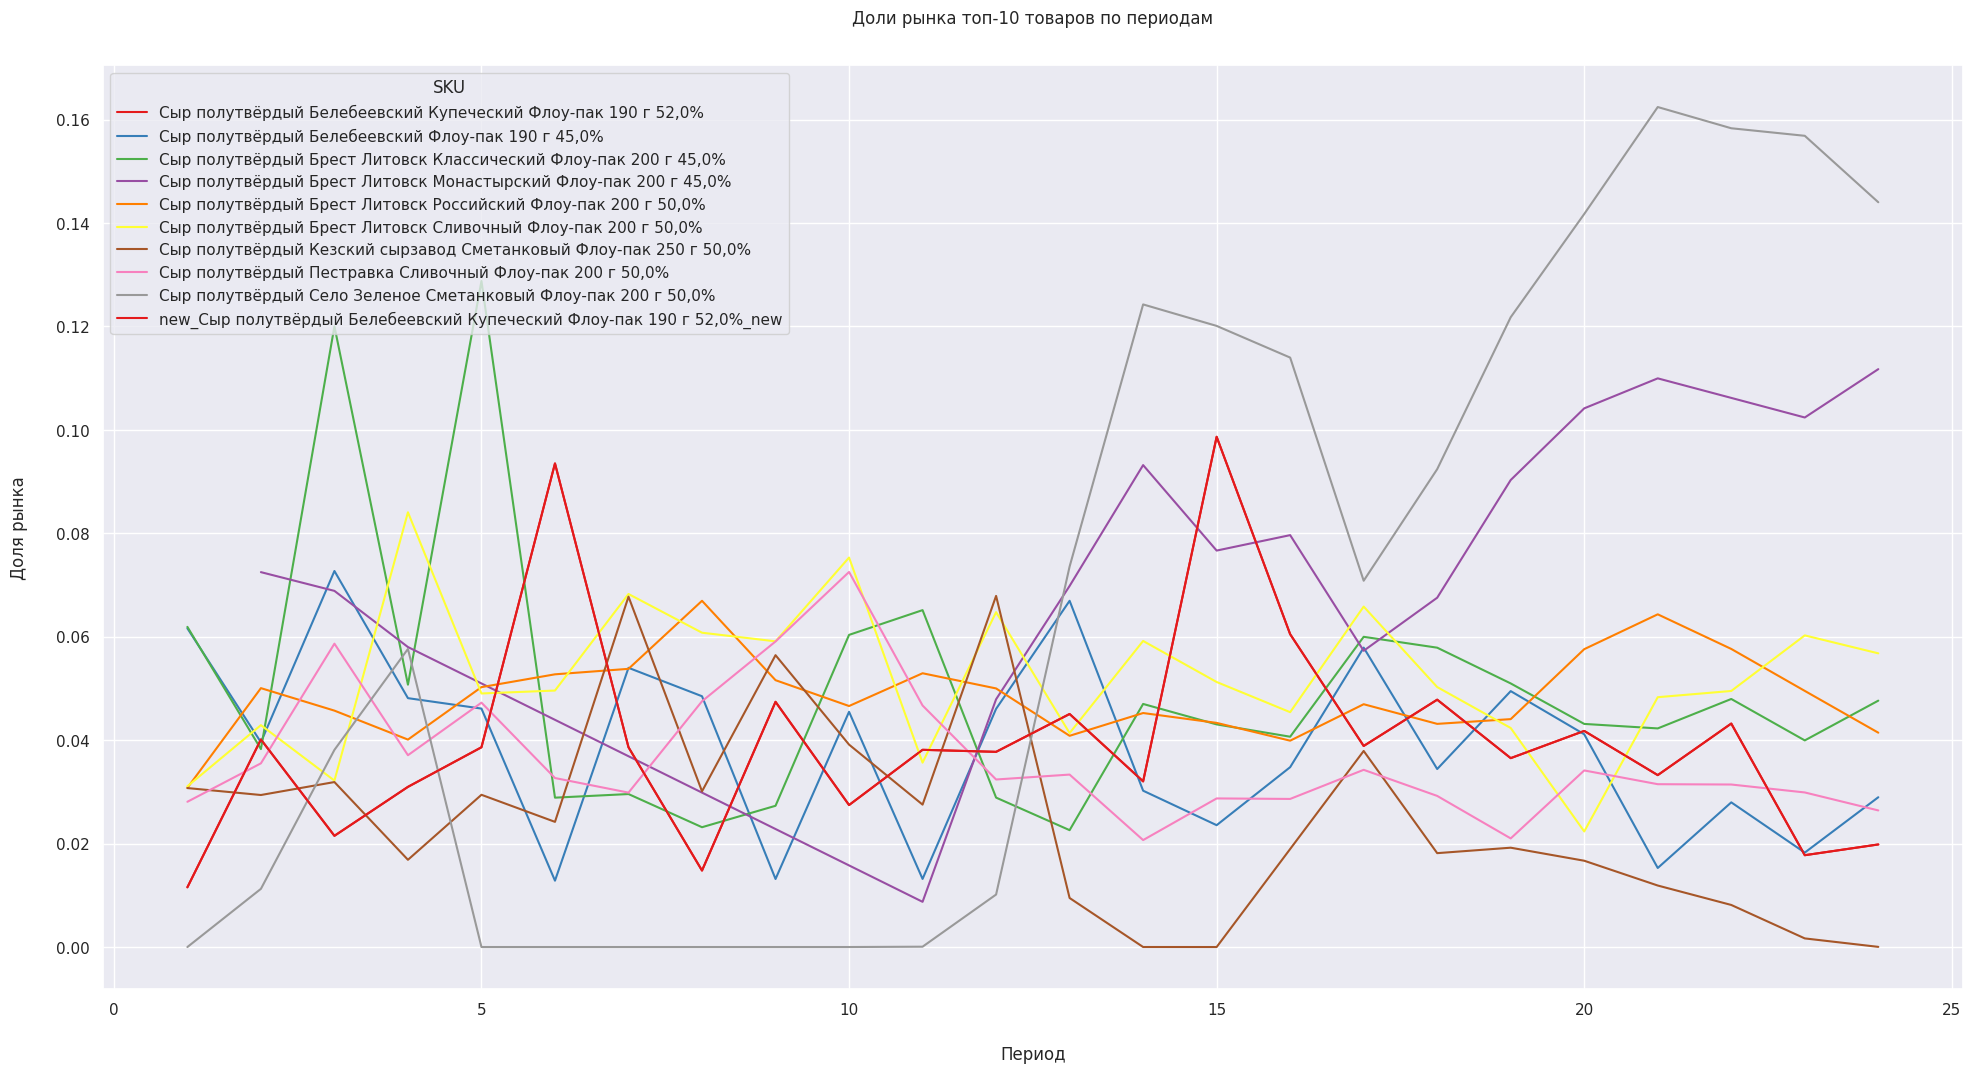

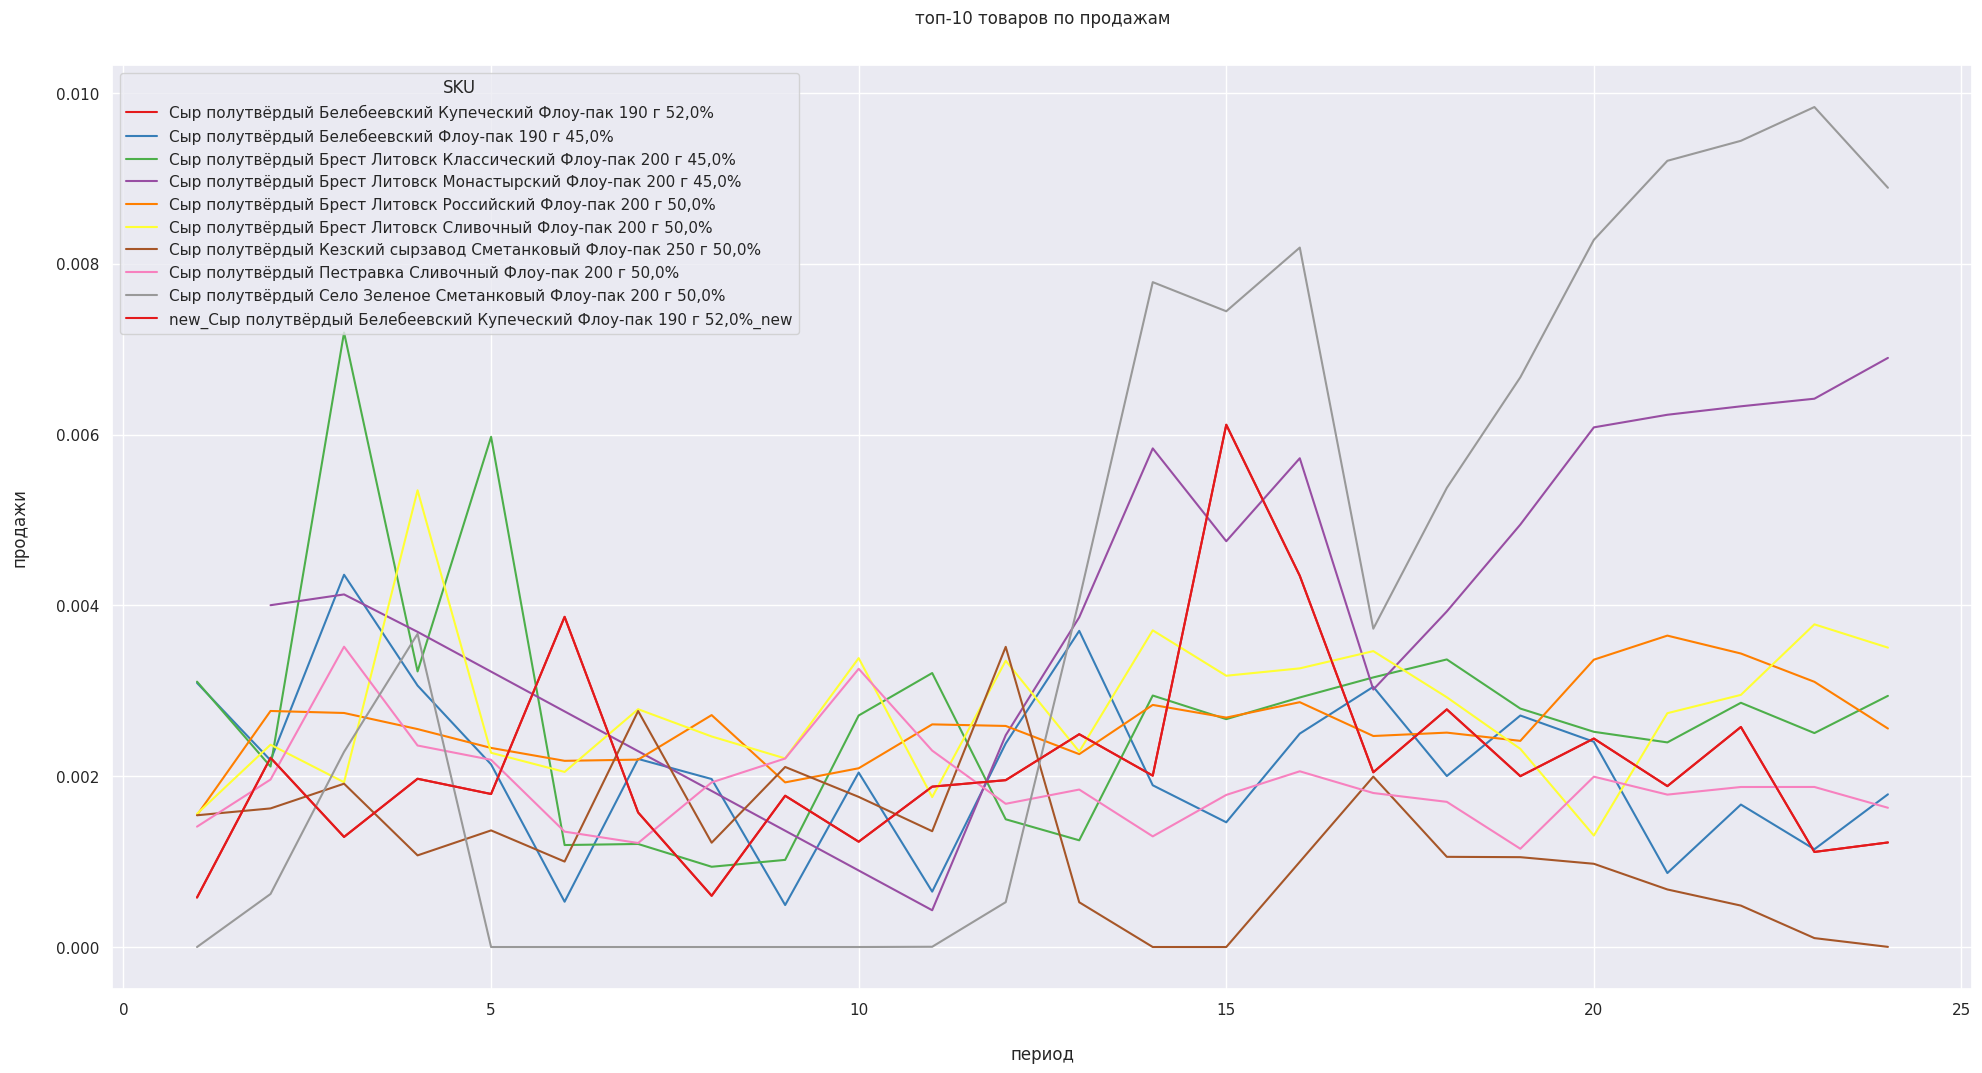

Базовая ску  Сыр полутвёрдый Брест Литовск Сливочный Флоу-пак 200 г 50,0%
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    125.6029
Link Function:                     IdentityLink Log Likelihood:                                  -762.7983
Number of Samples:                          566 AIC:                                             1778.8024
                                                AICc:                                            1852.5023
                                                GCV:                                                1.7453
                                                Scale:                                              1.0658
                                                Pseudo R-Squared:     

<ipython-input-17-749d1f8486e9>:390: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from pygam import LinearGAM, s, f
from sklearn.preprocessing import StandardScaler


if 'data' in locals():
    del data
data= df_train.copy()
data_50= df_test.copy()

if 2024 in data['Year'].unique().tolist():
  year_search=2024

else:
  year_search=2023


sns.set(style='darkgrid')

# Переименуем столбцы для удобства
data.rename(columns={
    'Month': 'month',
    'Year': 'year',
    'Sku_name': 'SKU',
    'Analytic1': 'Package_Info',
    'Articul8': 'Cheese_Type',
    'Brand': 'Brand',
    'PRICE_PER_UNIT': 'price_per_unit',
    'SALES_VOL': 'sales_volume',
    'SHARE_VOL_PROMO': 'promo_share',
    'SHARE_VOL': 'market_share_observed',
    'SHARE_VOL_SKU':'SHARE_VOL_SKU'
}, inplace=True)
data_50.rename(columns={
    'Month': 'month',
    'Year': 'year',
    'Sku_name': 'SKU',
    'Analytic1': 'Package_Info',
    'Articul8': 'Cheese_Type',
    'Brand': 'Brand',
    'PRICE_PER_UNIT': 'price_per_unit',
    'SALES_VOL': 'sales_volume',
    'SHARE_VOL_PROMO': 'promo_share',
    'SHARE_VOL': 'market_share_observed',
    'SHARE_VOL_SKU':'SHARE_VOL_SKU'
}, inplace=True)
#Создаем переменную 'period' на основе года и месяца
data['period'] = data['year'].astype(str) + '_' + data['month'].astype(str)
data_50['period'] = data_50['year'].astype(str) + '_' + data_50['month'].astype(str)
# Присваиваем уникальный номер каждому периоду
data['period'] = data['period'].astype('category').cat.codes + 1
data_50['period'] = data_50['period'].astype('category').cat.codes + 1


# Шаг 1: Посчитаем количество периодов для каждого SKU
period_counts = data.groupby('SKU')['period'].nunique().reset_index()
period_counts_50 = data_50.groupby('SKU')['period'].nunique().reset_index()
period_counts.columns = ['SKU', 'period_count']
period_counts_50.columns = ['SKU', 'period_count']

# Шаг 2: Найдем максимальное количество периодов
max_period_count = period_counts['period_count'].max()
# max_period_count_50 = period_counts_50['period_count'].max()

# Шаг 3: Отфильтруем только те SKU, которые продавались в максимальное количество периодов
max_period_skus = period_counts[period_counts['period_count'] == max_period_count]

# Шаг 4: Соединим с исходными данными для получения среднего значения 'er'
grouped = data.groupby('SKU')['er'].mean().reset_index()

# Шаг 5: Оставим только те SKU, которые продавались в максимальное количество периодов
filtered_grouped = grouped[grouped['SKU'].isin(max_period_skus['SKU'])]

# Шаг 6: Найдем SKU с максимальным 'er'
max_sku = filtered_grouped.loc[filtered_grouped['er'].idxmax()]



#Функция для извлечения веса из строки
def extract_weight(package_info):
    import re
    match = re.search(r'(\d+)\s*г', package_info)
    if match:
        return int(match.group(1))
    else:
        return np.nan

# Применение функции к столбцу 'Package_Info'
data['Package_Weight'] = data['Package_Info'].apply(extract_weight)
data_50['Package_Weight'] = data_50['Package_Info'].apply(extract_weight)


res_data = data.copy()
res_data_50 = data_50.copy()


# Заполняем пропущенные значения или удаляем строки с пропущенными значениями
data.dropna(inplace=True)
data_50.dropna(inplace=True)
# # Выбираем только топ-10 SKU по максимальной доле рынка
plt.figure(figsize=(24, 12))
top_sku = data.groupby('SKU')['market_share_observed'].max().nlargest(10).index
filtered_data = data[data['SKU'].isin(top_sku)]

sns.lineplot(data=filtered_data, x='period', y='market_share_observed', hue='SKU', palette='Set1')
plt.title('Доли рынка топ-10 товаров по периодам', pad=30)  # Сдвиг заголовка
plt.xlabel('Период', labelpad=20)  # Сдвиг подписи оси X
plt.ylabel('Доля рынка', labelpad=20)  #
plt.show()



plt.figure(figsize=(24, 12))
top_sku = data.groupby('SKU')['er'].max().nlargest(10).index
filtered_data = data[data['SKU'].isin(top_sku)]

sns.lineplot(data=filtered_data, x='period', y='er', hue='SKU', palette='Set1')
plt.title('топ-10 товаров по продажам', pad=30)  # Сдвиг заголовка
plt.xlabel('период', labelpad=20)  # Сдвиг подписи оси X
plt.ylabel('продажи', labelpad=20)  #
plt.show()

# base_sku = 'Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%'
base_sku = max_sku['SKU']
# # base_sku='Сыр полутвёрдый Сыробогатов Королевский стандарт Топленое молоко Флоу-пак 180 г 40,0%'
print(f'Базовая ску  {base_sku}')

if base_sku not in data['SKU'].unique():
    raise ValueError(f"Базовый SKU '{base_sku}' не найден в данных.")

data_categor = pd.DataFrame()
data_categor_50 = pd.DataFrame()
# Преобразуем категориальную переменную в числовую
for cat_i in ['Package_Info', 'Cheese_Type', 'Brand']:
    data_categor[cat_i]=pd.Categorical(data[cat_i]).codes
    data_categor_50[cat_i]=pd.Categorical(data_50[cat_i]).codes
# data_categor.rename(columns={'SKU':'SKU_cat'},inplace=True)

data_del= data.drop(['Package_Info', 'Cheese_Type', 'Brand'],axis=1)
data_del_50= data_50.drop(['Package_Info', 'Cheese_Type', 'Brand'],axis=1)

data = data_del.join(data_categor).copy()
data_50 = data_del_50.join(data_categor_50).copy()
# # Данные базового SKU
base_data = data[data['SKU'] == base_sku][['period', 'er']].rename(columns={'er': 'base_er'})
base_data_50 = data_50[data_50['SKU'] == base_sku][['period', 'er']].rename(columns={'er': 'base_er'})

characteristics = ['promo_share','price_per_unit','Package_Info', 'Cheese_Type', 'Brand']

base_data_only = data[data['SKU'] == base_sku][['period'] + characteristics].copy()
base_data_only_50 = data_50[data_50['SKU'] == base_sku][['period'] + characteristics].copy()

# Объединяем с основной таблицей
data = pd.merge(data, base_data, on='period', how='left')
data_50 = pd.merge(data_50, base_data_50, on='period', how='left')
# Удаляем строки, где нет данных базового SKU
data.dropna(subset=['base_er'], inplace=True)
data_50.dropna(subset=['base_er'], inplace=True)

data['log_share_ratio'] = np.log(data['er'] / data['base_er'])
data_50['log_share_ratio'] = np.log(data_50['er'] / data_50['base_er'])

ert = data.copy()
ert_50 = data_50.copy()

ert_50.to_excel('f1.xlsx')
data_cat=data.copy()
data_cat_50=data_50.copy()

base_characteristics = base_data_only.rename(columns=lambda x: 'base_' + x if x != 'period' else x)

base_characteristics_50 = base_data_only_50.rename(columns=lambda x: 'base_' + x if x != 'period' else x)
# Объединяем базовые характеристики с основной таблицей
data = pd.merge(data_cat, base_characteristics, on='period', how='left', suffixes=('', '_base'))
data_50 = pd.merge(data_cat_50, base_characteristics_50, on='period', how='left', suffixes=('', '_base'))

# Вычисляем разности характеристик
for char in characteristics:
    data['delta_' + char] = data[char] - data['base_' + char]
    data_50['delta_' + char] = data_50[char] - data_50['base_' + char]

data_test =data[data['year']<=2025].copy()
data =data[data['year']<=2025].copy()
# Установка случайного seed для воспроизводимости
# np.random.seed(42)

# # Случайное перемешивание индексов DataFrame
# indices = np.random.permutation(data.index)



# # Разделение индексов на тренировочные и тестовые
# split_point = int(0.8 * len(data))  # 80% тренировочных данных, 20% тестовых
# train_indices = indices[:split_point]


# # Разделение DataFrame на тренировочные и тестовые данные
# data_train = data.loc[train_indices]

# data_test = data[~data.index.isin(data_train.index)]
# data = data_train.copy()

# model_data = data[data['SKU'] != base_sku].copy()


# X_columns = ['delta_' + char for char in characteristics]

y = data['log_share_ratio']
X =  data[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand']]

y_50 = data_50['log_share_ratio']
X_50 =  data_50[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand']]


# # # scaler = MinMaxScaler()
scaler = StandardScaler()

# # Applying normalization to the selected columns
normalized_data = pd.DataFrame(scaler.fit_transform(X[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand']]), columns=['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand'])
del_data = X.drop(['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand'],axis=1).reset_index(drop=True)
X=del_data.join(normalized_data)


normalized_data_50 = pd.DataFrame(scaler.transform(X_50[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand']]), columns=['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand'])
del_data_50 = X_50.drop(['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand'],axis=1).reset_index(drop=True)
X_50=del_data_50.join(normalized_data_50)
# # Определим сетку гиперпараметров для поиска
# #_______________________
# from sklearn.model_selection import KFold, cross_val_score

# from pygam import LinearGAM, s, f
# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error

# # Определим формулу для модели LinearGAM
# lam_values = np.logspace(-3, 3, 10)  # значения регуляризации
# n_splines_values = [5, 10, 20]  # значения для количества сплайнов для s-функций

# # Настраиваем кросс-валидацию
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# # Списки для сохранения средних ошибок и гиперпараметров
# mean_rmse = []

# print("Начало кросс-валидации для подбора параметров сглаживания...")

# # Кросс-валидация и подбор гиперпараметров
# for n_splines in n_splines_values:
#     for lam in lam_values:
#         fold_rmse = []

#         # Проходим по всем фолдам кросс-валидации
#         for train_idx, val_idx in cv.split(X):
#             # Разбиваем данные на обучающие и тестовые
#             X_train, X_val = X.values[train_idx], X.values[val_idx]
#             y_train, y_val = y.values[train_idx], y.values[val_idx]

#             # Создаем новую модель для каждой итерации
#             gam = LinearGAM(s(0, n_splines=n_splines) + s(1, n_splines=n_splines) + f(2) + f(3) + f(4) + f(5), lam=lam)
#             gam.fit(X_train, y_train)

#             # Прогнозируем на валидационных данных
#             y_pred = gam.predict(X_val)

#             # Считаем RMSE для каждого фолда
#             rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#             fold_rmse.append(rmse)

#         # Сохраняем среднее значение RMSE для текущих гиперпараметров
#         mean_rmse.append({
#             'n_splines': n_splines,
#             'lam': lam,
#             'mean_rmse': np.mean(fold_rmse)
#         })

# # Найдем гиперпараметры с минимальным RMSE
# best_params = min(mean_rmse, key=lambda x: x['mean_rmse'])
# best_n_splines = best_params['n_splines']
# best_lam = best_params['lam']

# print(f"Оптимальное значение n_splines: {best_n_splines}, Оптимальное значение ламбда: {best_lam}")

# # Обучаем модель с оптимальными гиперпараметрами на всех данных
# gam = LinearGAM(s(0, n_splines=best_n_splines) + s(1, n_splines=best_n_splines) + f(2) + f(3) + f(4) + f(5), lam=best_lam)
# gam.fit(X.values, y.values)

# # Прогнозируем систематическую утилиту
# data['V'] = gam.predict(X.values)
# # #_______________________



# # Задаем сетку значений для гиперпараметров
# lam_values = np.logspace(-3, 3, 30)  # значения регуляризации
# n_splines_values = [5, 10, 20,100]  # значения для количества сплайнов для s-функций

# # Список для сохранения ошибок RMSE и гиперпараметров
# mean_rmse = []

# print("Подбор параметров сглаживания без кросс-валидации...")

# # Перебираем значения параметров n_splines и lam
# for n_splines in n_splines_values:
#     for lam in lam_values:
#         # Создаем и обучаем модель с текущими значениями гиперпараметров
#         gam = LinearGAM(s(0, n_splines=n_splines) + s(1, n_splines=n_splines) + f(2) + f(3) + f(4) + f(5), lam=lam)
#         gam.fit(X.values, y.values)

#         # Прогнозируем и вычисляем ошибку RMSE на тех же данных
#         y_pred = gam.predict(X.values)
#         rmse = np.sqrt(mean_squared_error(y.values, y_pred))

#         # Сохраняем значения гиперпараметров и RMSE
#         mean_rmse.append({
#             'n_splines': n_splines,
#             'lam': lam,
#             'rmse': rmse
#         })

# # Выбираем комбинацию параметров с минимальным RMSE
# best_params = min(mean_rmse, key=lambda x: x['rmse'])
# best_n_splines = best_params['n_splines']
# best_lam = best_params['lam']

# print(f"Оптимальное значение n_splines: {best_n_splines}, Оптимальное значение ламбда: {best_lam}")

# # Обучаем модель с оптимальными гиперпараметрами на всех данных
# gam = LinearGAM(s(0, n_splines=best_n_splines) + s(1, n_splines=best_n_splines) + f(2) + f(3) + f(4) + f(5), lam=best_lam)
# gam.fit(X.values, y.values)

# # Прогнозируем систематическую утилиту
# data['V'] = gam.predict(X.values)
# data.loc[data['SKU'] == base_sku, 'V'] = 0
# data['pred_market_share'] = np.exp(data['V']) * data['base_er']

# # #_________________
# gam = LinearGAM(s(0)+s(1)+f(2) + f(3) + f(4)+f(5)).fit(X, y)

# # gam = LinearGAM(f(0) + f(1) + f(2)+s(3)+s(4)).fit(X, y)
# gam.gridsearch(X, y)

# # # #__________
# # # Прогнозируем систематическую утилиту
# data['V'] = gam.predict(X)
# data.loc[data['SKU'] == base_sku, 'V'] = 0
# # Обратное преобразование логарифмического отношения к реальным значениям продаж
# # data['pred_market_share'] = np.exp(data['V']) * data['base_sales_volume']


# # Восстановление предсказанных значений доли продаж SKU
# data['pred_market_share'] = np.exp(data['V']) * data['base_er']
# # #____________________


# optimal_n_splines = 100
# optimal_lam = 0.01
optimal_n_splines = 100
optimal_lam = 0.1
# gam = LinearGAM(
#     s(0) +
#     s(1) +
#     f(2) +
#     f(3) +
#     f(4),
#     lam=optimal_lam
# )
gam = LinearGAM(
    s(0, n_splines=optimal_n_splines) +
    s(1, n_splines=optimal_n_splines) +
    f(2) +
    f(3) +
    f(4),
    lam=optimal_lam
)

# # Прогнозируем систематическую утилиту
gam.fit(X.values, y.values)
# gam.gridsearch(X, y)
data['V'] = gam.predict(X)
data.loc[data['SKU'] == base_sku, 'V'] = 0
# Обратное преобразование логарифмического отношения к реальным значениям продаж
data['pred_market_share'] = np.exp(data['V']) * data['base_er']
data.to_excel('data.xlsx')

gam.summary()


# gam.gridsearch(X, y)
data_50['V'] = gam.predict(X_50)
data_50.loc[data_50['SKU'] == base_sku, 'V'] = 0
# Обратное преобразование логарифмического отношения к реальным значениям продаж
data_50['pred_market_share_50'] = np.exp(data_50['V']) * data_50['base_er']
data_50.to_excel('data_50.xlsx')


In [18]:
true_pred =data.groupby('SKU')['pred_market_share'].sum()
true_pred



,pred_market_share
SKU,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0605241014
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0255134505
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0258048614
"Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%",0.0294037487
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.0553991550
"Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%",0.0386085401
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.0513089354
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.0587358966
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.0388294336


In [19]:
true_pred.sum()


0.9891493055081564

In [20]:
import pandas as pd
mean_org = pd.DataFrame()
mean_org['org_market_share'] = df_train.groupby('Sku_name')['er'].sum()
mean_org['org_market_share']

,org_market_share
Sku_name,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0517495522
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0250485541
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0268909093
"Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%",0.0283414407
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.0517495522
"Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%",0.0300021280
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.0502870437
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.0657101696
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.0365813538


In [21]:
mean_org['org_market_share'].sum()

0.9999999999999999

In [22]:
# mean_market_shares
# mean_org

# market_share_before,new_df
from sklearn.metrics import mean_absolute_error, r2_score
# Расчет MAE
mae = mean_absolute_error(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
print(f'MAE: {mae:.2f}')

# Расчет R²
r2 = r2_score(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
# print(f'R²: {r2:.2f}')

# Расчет WAPE
wape = sum(abs(mean_org['org_market_share'].values - true_pred.to_frame()['pred_market_share'].values) / sum(mean_org['org_market_share'].values))
print(f'WAPE: {wape:.2f}')

# Количество наблюдений и количество предикторов
n = len(mean_org)  # количество наблюдений
p = 1  # количество предикторов (в данном случае это предсказанная доля рынка)

# Вычисление скорректированного R²
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Вывод значений R² и R²_adj
print(f'R²: {r2:.2f}')
print(f'R² Adjusted: {r2_adj:.2f}')

MAE: 0.01
WAPE: 0.19
R²: 0.51
R² Adjusted: 0.49


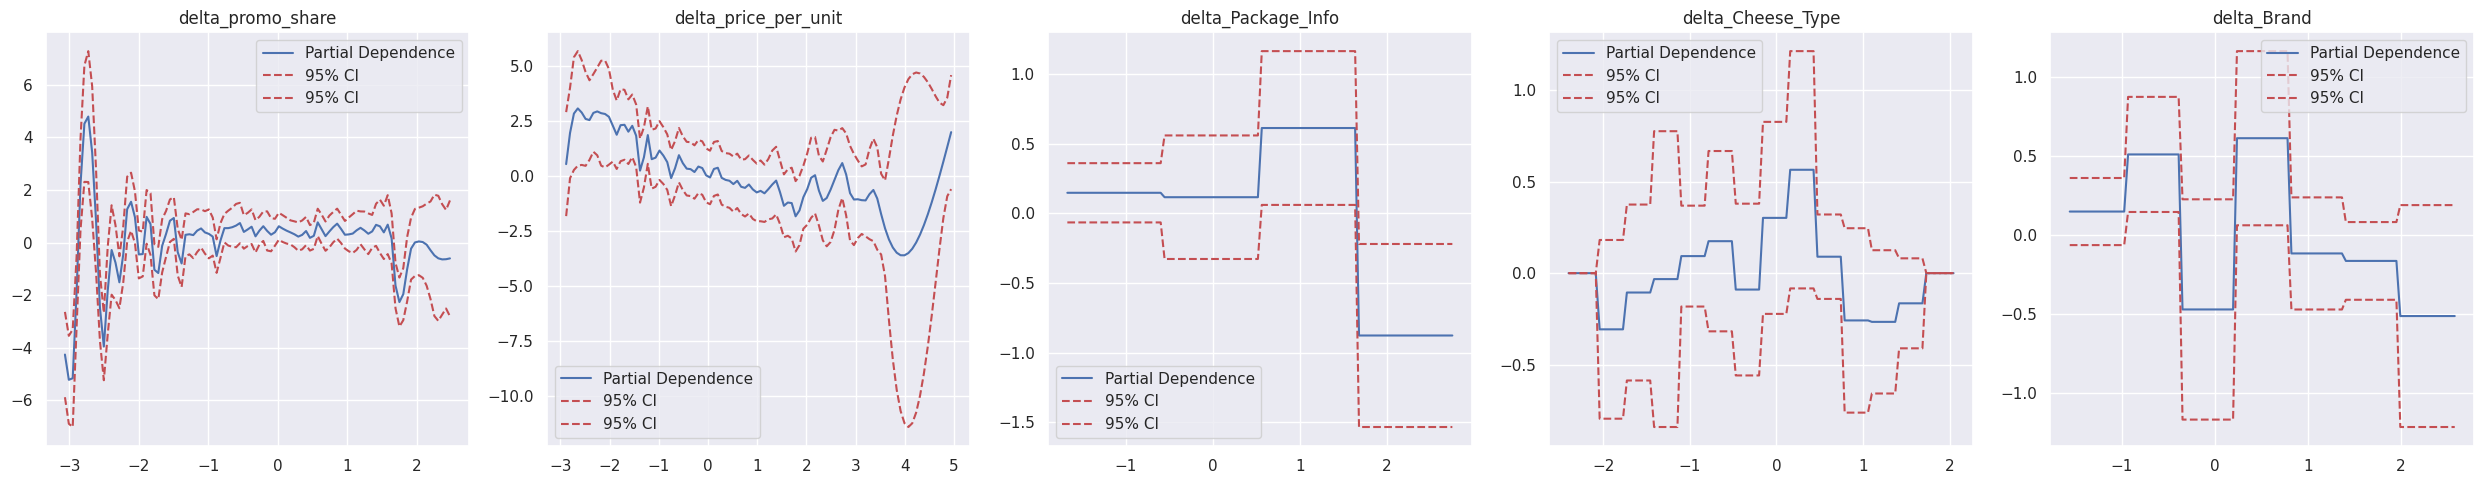

In [23]:
from pygam import LinearGAM, s, f
from pygam.datasets import wage

titles = ['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand']

# Создание подграфиков с заданным размером фигуры
fig, axs = plt.subplots(1, 5, figsize=(25, 5))  # Ширина 25 дюймов и высота 5 дюймов

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pd = gam.partial_dependence(term=i, X=XX)
    ppd = gam.partial_dependence(term=i, X=XX, width=.95)

    ax.plot(XX[:, i], pd, label='Partial Dependence')
    ax.plot(XX[:, i], ppd[1], c='r', ls='--', label='95% CI')


    ax.set_title(titles[i])
    ax.legend()

plt.tight_layout()
plt.show()

In [24]:
X.describe()

,delta_promo_share,delta_price_per_unit,delta_Package_Info,delta_Cheese_Type,delta_Brand
count,566.0000000000,566.0000000000,566.0000000000,566.0000000000,566.0000000000
mean,-0.0000000000,0.0000000000,0.0000000000,0.0000000000,-0.0000000000
std,1.0008845645,1.0008845645,1.0008845645,1.0008845645,1.0008845645
min,-3.0613965295,-2.8827755565,-1.1680167462,-1.8986254119,-1.0610527631
25%,-0.5626273605,-0.5987201477,-1.1680167462,-0.8391016425,-1.0610527631
50%,0.1643809221,-0.0474255107,-0.0281935077,0.4853030693,-0.5374643900
75%,0.6565429985,0.4323005145,-0.0281935077,0.7501840117,1.0333007292
max,2.4743334776,4.9435997844,2.2514529695,1.5448268387,2.0804774753


In [25]:
true_pred_50 =data_50.groupby('SKU')['pred_market_share_50'].sum()
true_pred_50

,pred_market_share_50
SKU,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0653242933
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0314368992
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0423969578
"Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%",0.0428404736
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.0801220451
"Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%",0.0560285186
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.1392764653
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.0635503228
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.0327016330


In [26]:
true_pred_50.sum()

1.3785995274144178

In [27]:
true_pred

,pred_market_share
SKU,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0605241014
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0255134505
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0258048614
"Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%",0.0294037487
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.0553991550
"Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%",0.0386085401
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.0513089354
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.0587358966
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.0388294336


In [28]:
import pandas as pd
# Объединяем expanded_series и true_pred_50 по индексу
combined_series = pd.concat([true_pred, true_pred_50], axis=1)

# Задаем имена колонок для удобства
combined_series.columns = ['True_Pred', 'True_Pred_50']

# Заполняем отсутствующие значения нулями
combined_series = combined_series.fillna(0)

# Вывод результата
combined_series


,True_Pred,True_Pred_50
SKU,,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0605241014,0.0653242933
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0255134505,0.0314368992
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0258048614,0.0423969578
"Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%",0.0294037487,0.0428404736
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.0553991550,0.0801220451
"Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%",0.0386085401,0.0560285186
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.0513089354,0.1392764653
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.0587358966,0.0635503228
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.0388294336,0.0327016330


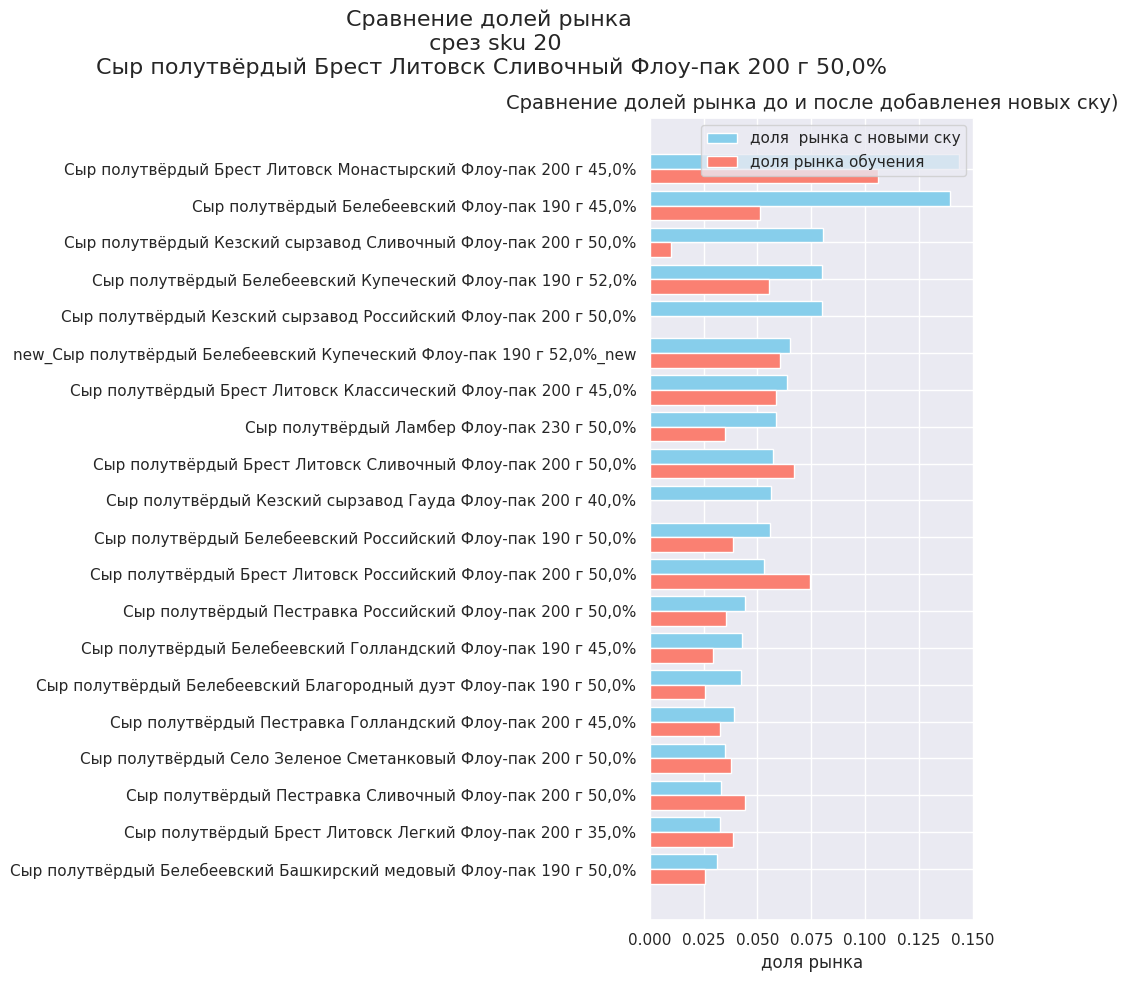

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='доля  рынка с новыми ску')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='доля рынка обучения')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Извлечение данных для построения диаграмм
sizes_org = combined_series['True_Pred_50'].values
sizes_pred =combined_series['True_Pred'].values
labels_org = combined_series.index.values
top_25=20
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 10))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка до и после добавленея новых ску)', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


In [30]:
combined_series['True_Pred_50'].sum()

1.3785995274144176

In [31]:
combined_series['True_Pred'].sum()

0.9891493055081564

In [32]:
vector = [0, 2, 0.2, 0.3]
total_sum = sum(vector)

# Нормализация вектора
normalized_vector = [x / total_sum for x in vector]

# Печать результата
normalized_vector


[0.0, 0.8, 0.08, 0.12]

In [33]:
all_30 =X.join(y).join(data['SKU']).join(data['V']).join(data['pred_market_share'])
all_30.rename(columns={'log_share_ratio': 'y_true_train','V': 'y_pred_train','pred_market_share':'y_pred_train_abs'}, inplace=True)
all_30['y_pred_train_abs_norm']=all_30['y_pred_train_abs']/all_30['y_pred_train_abs'].sum()
all_30

,delta_promo_share,delta_price_per_unit,delta_Package_Info,delta_Cheese_Type,delta_Brand,y_true_train,SKU,y_pred_train,y_pred_train_abs,y_pred_train_abs_norm
0,0.5531741798,0.0054785741,-1.1680167462,-1.8986254119,-1.0610527631,-0.0490543472,Сыр полутвёрдый Белебеевский Башкирский медовы...,-0.9219015940,0.0006204585,0.0006272647
1,1.3949522948,0.2718929709,-1.1680167462,-1.8986254119,-1.0610527631,-0.4387488615,Сыр полутвёрдый Белебеевский Башкирский медовы...,-0.8766415826,0.0009520950,0.0009625392
2,-0.8965450005,0.8664871268,-1.1680167462,-1.8986254119,-1.0610527631,-1.8891688567,Сыр полутвёрдый Белебеевский Башкирский медовы...,-2.3217775910,0.0002230902,0.0002255375
3,0.2155786063,0.9873915276,-1.1680167462,-1.8986254119,-1.0610527631,-1.4118507671,Сыр полутвёрдый Белебеевский Башкирский медовы...,-1.8282087704,0.0005567265,0.0005628336
4,0.2664438405,0.1796025529,-1.1680167462,-1.8986254119,-1.0610527631,-0.1682582476,Сыр полутвёрдый Белебеевский Башкирский медовы...,-0.7153535463,0.0010026421,0.0010136409
...,...,...,...,...,...,...,...,...,...,...
561,-0.2854780423,-0.0405967291,-0.0281935077,0.7501840117,-0.5374643900,-0.6139509425,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,-0.3222595232,0.0026862680,0.0027157356
562,1.1652602747,-0.2694845367,-0.0281935077,0.7501840117,-0.5374643900,-0.4031382673,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,0.0417873059,0.0020115664,0.0020336327
563,0.8894603718,-0.8653359156,-0.0281935077,0.7501840117,-0.5374643900,0.6550408554,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,0.8981743947,0.0077977555,0.0078832947
564,-0.0553374554,0.8225971178,-0.0281935077,0.7501840117,-0.5374643900,-0.9984947741,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,-0.7372855291,0.0025582080,0.0025862708


In [34]:
all_30['y_pred_train_abs_norm'].sum()

1.0000000000000002

In [35]:
all_50 = X_50.join(data_50['V']).join(data_50['pred_market_share_50']).join(data_50['SKU'])
all_50.rename(columns={'V': 'y_pred_test_50','pred_market_share_50':'y_pred_test_abs_50'}, inplace=True)
all_50['y_pred_test_abs_norm_50']=all_50['y_pred_test_abs_50']/all_50['y_pred_test_abs_50'].sum()
all_50

,delta_promo_share,delta_price_per_unit,delta_Package_Info,delta_Cheese_Type,delta_Brand,y_pred_test_50,y_pred_test_abs_50,SKU,y_pred_test_abs_norm_50
0,0.5295828811,0.0360536576,-1.1680167462,-1.8986254119,-1.0610527631,-1.1456084017,0.0069078125,Сыр полутвёрдый Белебеевский Башкирский медовы...,0.0050107463
1,1.5367780915,-0.7614958821,-1.1680167462,-1.8986254119,-1.0610527631,-1.0587242659,0.0066160030,Сыр полутвёрдый Белебеевский Башкирский медовы...,0.0047990754
2,1.2019151350,-0.5953494536,-1.1680167462,-1.8986254119,-1.0610527631,0.0703053064,0.0179130836,Сыр полутвёрдый Белебеевский Башкирский медовы...,0.0129936818
3,1.3337670792,-0.3721599604,-1.1680167462,-1.6337444696,-1.0610527631,-0.4982442154,0.0131973653,Сыр полутвёрдый Белебеевский Благородный дуэт ...,0.0095730232
4,1.0012197645,-0.5359990101,-1.1680167462,-1.6337444696,-1.0610527631,-0.1660795378,0.0161534903,Сыр полутвёрдый Белебеевский Благородный дуэт ...,0.0117173189
...,...,...,...,...,...,...,...,...,...
73,-0.1097503748,-1.1882796540,-0.0281935077,1.0150649540,2.0804774753,-0.2140057889,0.0153975729,Сыр полутвёрдый Село Зеленое Сметанковый Флоу-...,0.0111689962
74,-1.5820339183,-1.0417753498,-0.0281935077,1.0150649540,2.0804774753,-0.4004991942,0.0111867146,Сыр полутвёрдый Село Зеленое Сметанковый Флоу-...,0.0081145498
75,0.8111560135,-0.0514294517,-0.0281935077,0.7501840117,-0.5374643900,0.0191524081,0.0221406178,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,0.0160602245
76,0.8700472065,-0.3340310494,-0.0281935077,0.7501840117,-0.5374643900,0.2541115822,0.0245896904,new_Сыр полутвёрдый Белебеевский Купеческий Фл...,0.0178367175


In [36]:
all_50['y_pred_test_abs_norm_50'].sum()

1.0

In [37]:
import pandas as pd
df_30 = pd.DataFrame()
df_30=all_30.groupby('SKU')['y_pred_train_abs_norm'].sum()
df_50 = pd.DataFrame()
df_50=all_50.groupby('SKU')['y_pred_test_abs_norm_50'].sum()

# Объединяем expanded_series и true_pred_50 по индексу
combined_series_1 = pd.concat([df_30, df_50], axis=1)

# Задаем имена колонок для удобства
combined_series_1.columns = ['True_Pred_1', 'True_Pred_50_1']

# Заполняем отсутствующие значения нулями
combined_series_1 = combined_series_1.fillna(0)

# Вывод результата
cc= combined_series_1.join(combined_series)
cc

,True_Pred_1,True_Pred_50_1,True_Pred,True_Pred_50
SKU,,,,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0611880340,0.0473845319,0.0605241014,0.0653242933
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0257933260,0.0228035035,0.0255134505,0.0314368992
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0260879336,0.0307536431,0.0258048614,0.0423969578
"Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%",0.0297262997,0.0310753578,0.0294037487,0.0428404736
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.0560068684,0.0581184336,0.0553991550,0.0801220451
"Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%",0.0390320651,0.0406416203,0.0386085401,0.0560285186
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.0518717802,0.1010275011,0.0513089354,0.1392764653
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.0593802131,0.0460977401,0.0587358966,0.0635503228
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.0392553818,0.0237209083,0.0388294336,0.0327016330


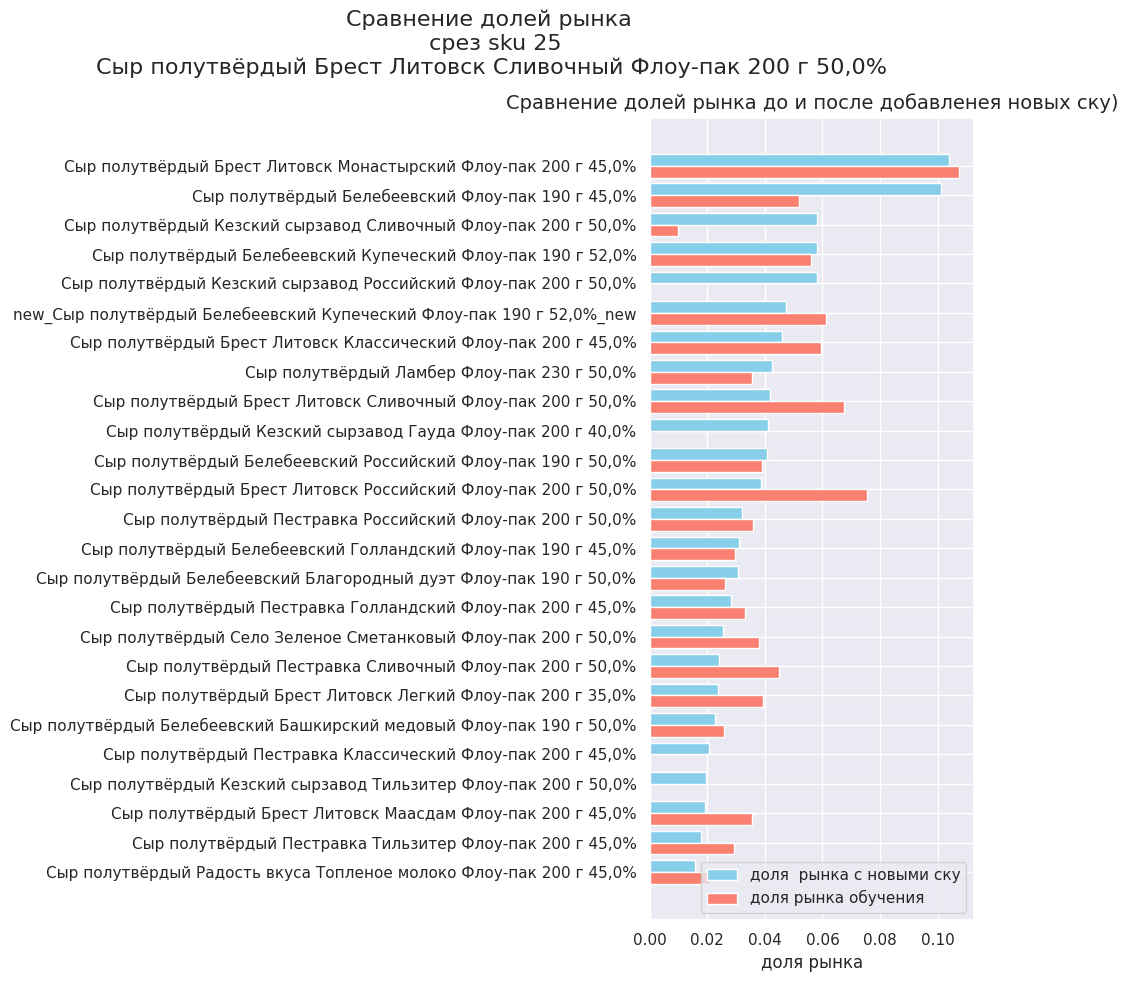

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='доля  рынка с новыми ску')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='доля рынка обучения')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Извлечение данных для построения диаграмм
sizes_org = combined_series_1['True_Pred_50_1'].values
sizes_pred =combined_series_1['True_Pred_1'].values
labels_org = combined_series_1.index.values
top_25=25
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 10))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка до и после добавленея новых ску)', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


In [39]:
cc['True_Pred_50_1'].sum()

1.0

In [40]:
cc['True_Pred_50'].sum()

1.3785995274144176

In [41]:
cc['True_Pred_1'].sum()


1.0000000000000002

In [42]:
cc['True_Pred'].sum()

0.9891493055081564

In [43]:
import pandas as pd
df_test_org = pd.DataFrame()
df_test_org['org_market_share_test'] = df_test.groupby('Sku_name')['er'].sum()
df_test_org['org_market_share_test']

data_50['pred_market_share_50']

,pred_market_share_50
0,0.0069078125
1,0.0066160030
2,0.0179130836
3,0.0131973653
4,0.0161534903
...,...
73,0.0153975729
74,0.0111867146
75,0.0221406178
76,0.0245896904


In [44]:
import pandas as pd
df_test_pred = pd.DataFrame()
df_test_pred['pred_market_share_test'] = data_50.groupby('SKU')['pred_market_share_50'].sum()
df_test_pred['pred_market_share_test']



,pred_market_share_test
SKU,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0653242933
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0314368992
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0423969578
"Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%",0.0428404736
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.0801220451
"Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%",0.0560285186
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.1392764653
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.0635503228
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.0327016330


In [45]:
df_test_pred['pred_market_share_test'].sum()

1.3785995274144178

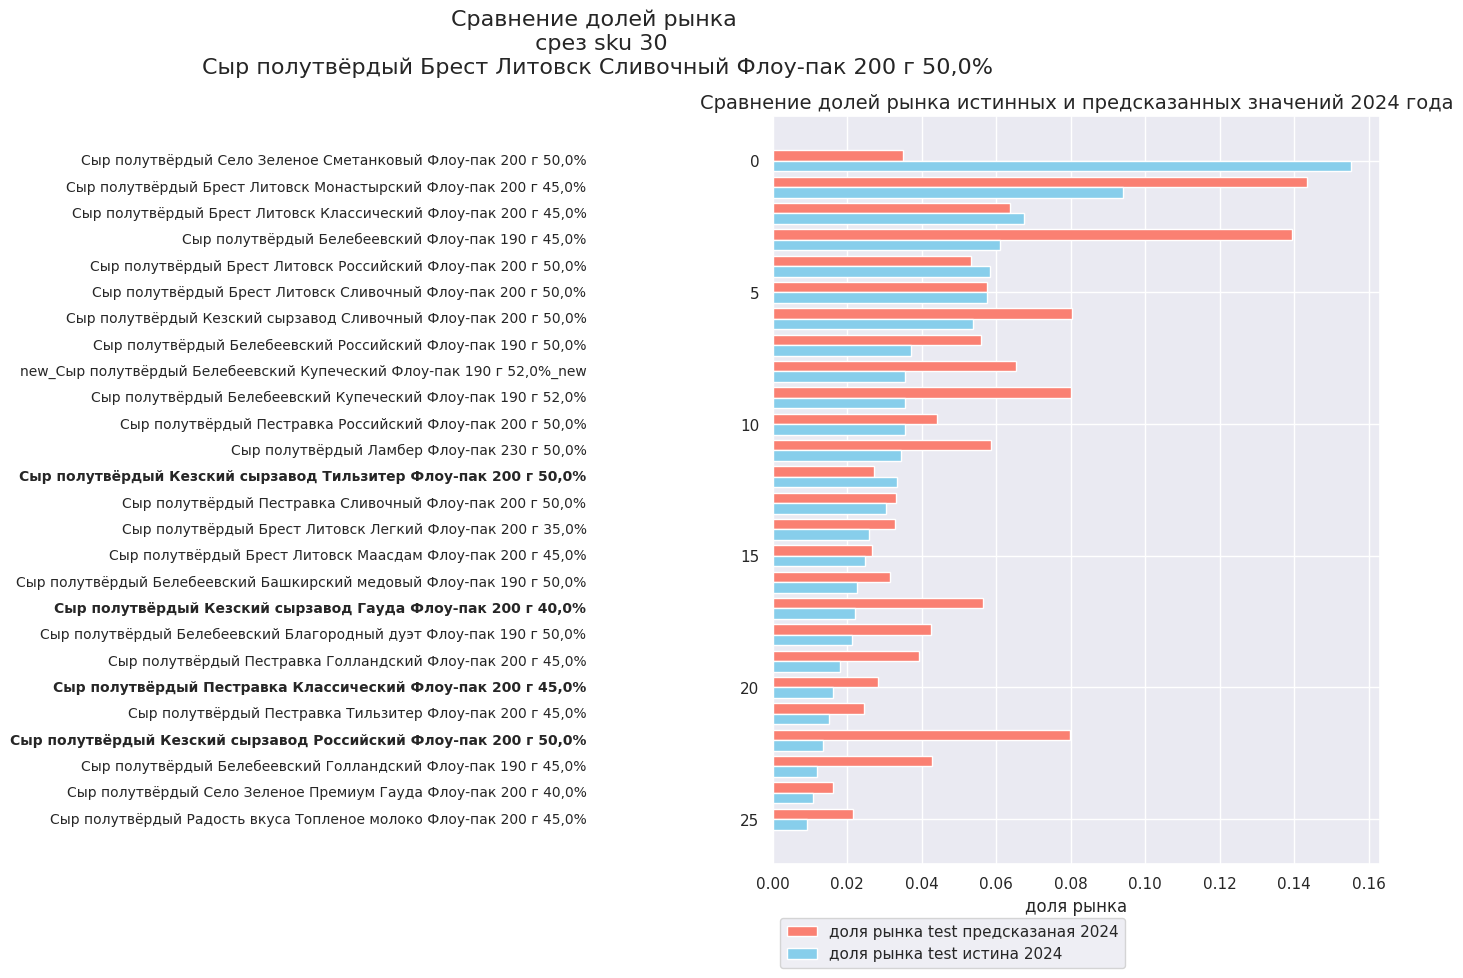

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Список меток, которые нужно выделить жирным шрифтом
    bold_labels = lst_new_sku_2024
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='доля рынка test предсказаная 2024')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='доля рынка test истина 2024')

    # Установка меток на оси Y с выделением жирным шрифтом
    for i, label in enumerate(filtered_labels):
        if label in bold_labels:
            ax.text(-0.05, y_pos[i], label, va='center', ha='right', fontsize=10, fontweight='bold')  # Жирный шрифт
        else:
            ax.text(-0.05, y_pos[i], label, va='center', ha='right', fontsize=10)

    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('доля рынка')
    ax.set_title(title, fontsize=14)

    ax.legend(loc='lower left', bbox_to_anchor=(0, -0.15))  # Расположение легенды снизу слева
    return ax

# Извлечение данных для построения диаграмм
sizes_org = df_test_org['org_market_share_test'].values
sizes_pred = df_test_pred['pred_market_share_test'].values
labels_org = df_test_org.index.values
top_25 = 30

# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(16, 10))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка истинных и предсказанных значений 2024 года', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


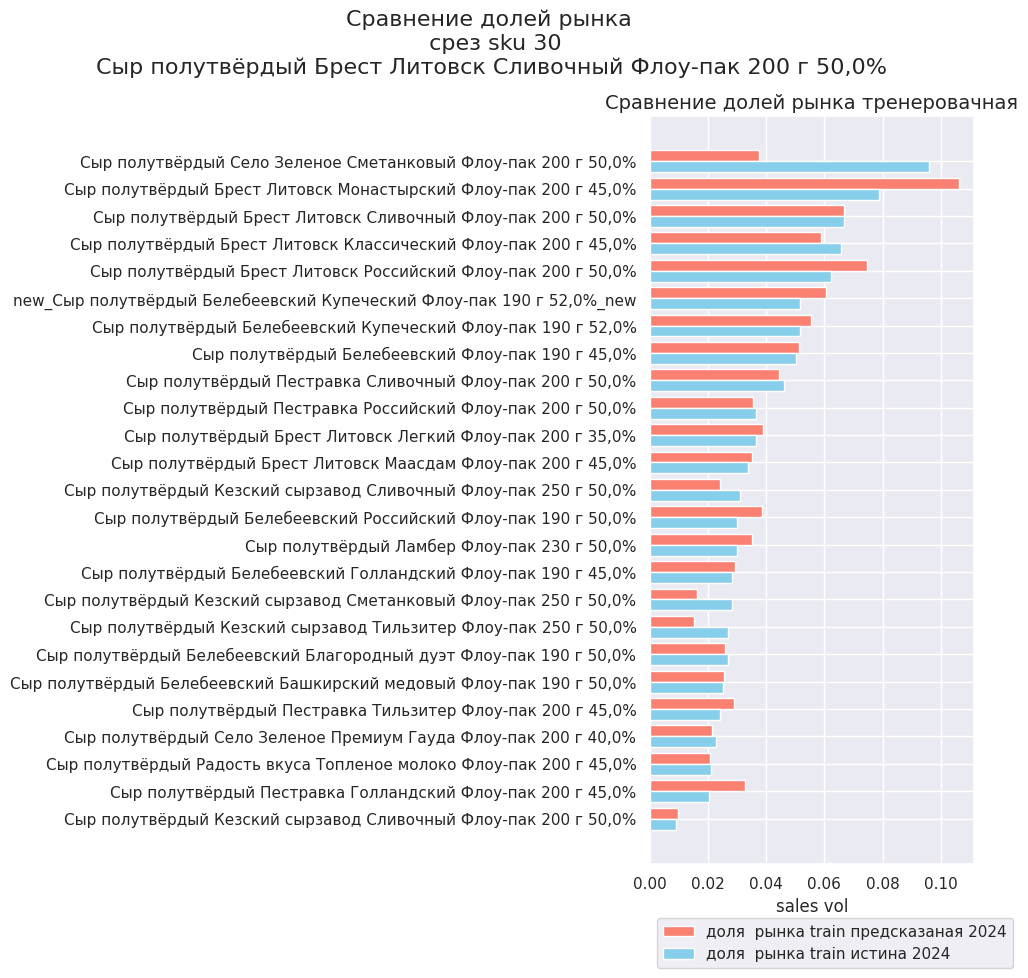

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='доля  рынка train предсказаная 2024')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='доля  рынка train истина 2024')

    # Установка меток на оси Ycolor='skyblue'
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('sales vol')
    ax.set_title(title, fontsize=14)
    ax.legend(loc='lower left', bbox_to_anchor=(0, -0.15))  # Расположение легенды снизу слева

    return ax

# Извлечение данных для построения диаграмм
sizes_org = mean_org['org_market_share'].values
sizes_pred = true_pred.to_frame()['pred_market_share'].values
labels_org = mean_org.index.values
top_25=30
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 10))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка тренеровачная', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


In [48]:
df_test_pred['pred_market_share_test']

,pred_market_share_test
SKU,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0653242933
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0314368992
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0423969578
"Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%",0.0428404736
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.0801220451
"Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%",0.0560285186
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.1392764653
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.0635503228
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.0327016330


In [49]:
df_test_pred['pred_market_share_test'].sum()

1.3785995274144178

In [50]:
df_test_org['org_market_share_test'].sum()

1.0

In [51]:
df_test_org['org_market_share_test']

,org_market_share_test
Sku_name,
"new_Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%_new",0.0354415071
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0224809654
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0212370245
"Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%",0.0119205360
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.0354415071
"Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%",0.0371662450
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.0609535904
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.0673142819
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.0257678941


In [52]:
# mean_market_shares
# mean_org

# market_share_before,new_df
from sklearn.metrics import mean_absolute_error, r2_score
# Расчет MAE
mae = mean_absolute_error(df_test_org['org_market_share_test'].values,df_test_pred['pred_market_share_test'].values)
print(f'MAE: {mae:.2f}')

# Расчет R²
r2 = r2_score(df_test_org['org_market_share_test'].values,df_test_pred['pred_market_share_test'])
# print(f'R²: {r2:.2f}')

# Расчет WAPE
wape = sum(abs(df_test_org['org_market_share_test'].values - df_test_pred['pred_market_share_test']) / sum(df_test_org['org_market_share_test'].values))
print(f'WAPE: {wape:.2f}')

# Количество наблюдений и количество предикторов
n = len(mean_org)  # количество наблюдений
p = 1  # количество предикторов (в данном случае это предсказанная доля рынка)

# Вычисление скорректированного R²
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Вывод значений R² и R²_adj
print(f'R²: {r2:.2f}')
print(f'R² Adjusted: {r2_adj:.2f}')

MAE: 0.02
WAPE: 0.65
R²: -0.44
R² Adjusted: -0.51


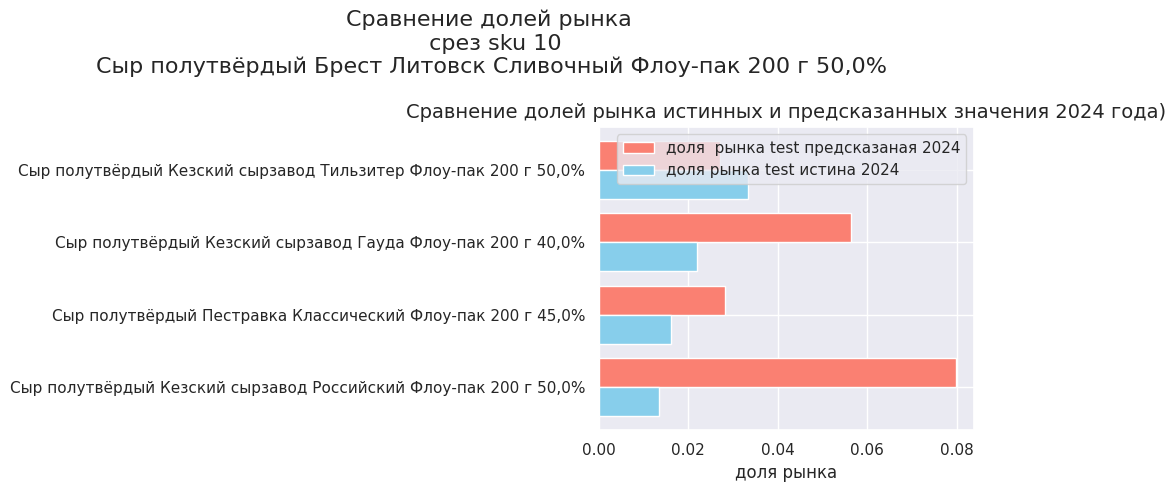

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='доля  рынка test предсказаная 2024')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='доля рынка test истина 2024')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax


new_sku_org= df_test_org[df_test_org.index.isin(lst_new_sku_2024)]

new_sku_pred= df_test_pred[df_test_pred.index.isin(lst_new_sku_2024)]

# Извлечение данных для построения диаграмм
sizes_org = new_sku_org['org_market_share_test'].values
sizes_pred =new_sku_pred['pred_market_share_test'].values
labels_org = new_sku_org.index.values
top_25=10
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 5))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка истинных и предсказанных значения 2024 года)', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


In [54]:
new_sku_org

,org_market_share_test
Sku_name,
"Сыр полутвёрдый Кезский сырзавод Гауда Флоу-пак 200 г 40,0%",0.0219996421
"Сыр полутвёрдый Кезский сырзавод Российский Флоу-пак 200 г 50,0%",0.0135100360
"Сыр полутвёрдый Кезский сырзавод Тильзитер Флоу-пак 200 г 50,0%",0.0334173369
"Сыр полутвёрдый Пестравка Классический Флоу-пак 200 г 45,0%",0.0160551515


In [55]:
new_sku_pred

,pred_market_share_test
SKU,
"Сыр полутвёрдый Кезский сырзавод Гауда Флоу-пак 200 г 40,0%",0.0564664909
"Сыр полутвёрдый Кезский сырзавод Российский Флоу-пак 200 г 50,0%",0.0798817643
"Сыр полутвёрдый Кезский сырзавод Тильзитер Флоу-пак 200 г 50,0%",0.0270820644
"Сыр полутвёрдый Пестравка Классический Флоу-пак 200 г 45,0%",0.0282459052


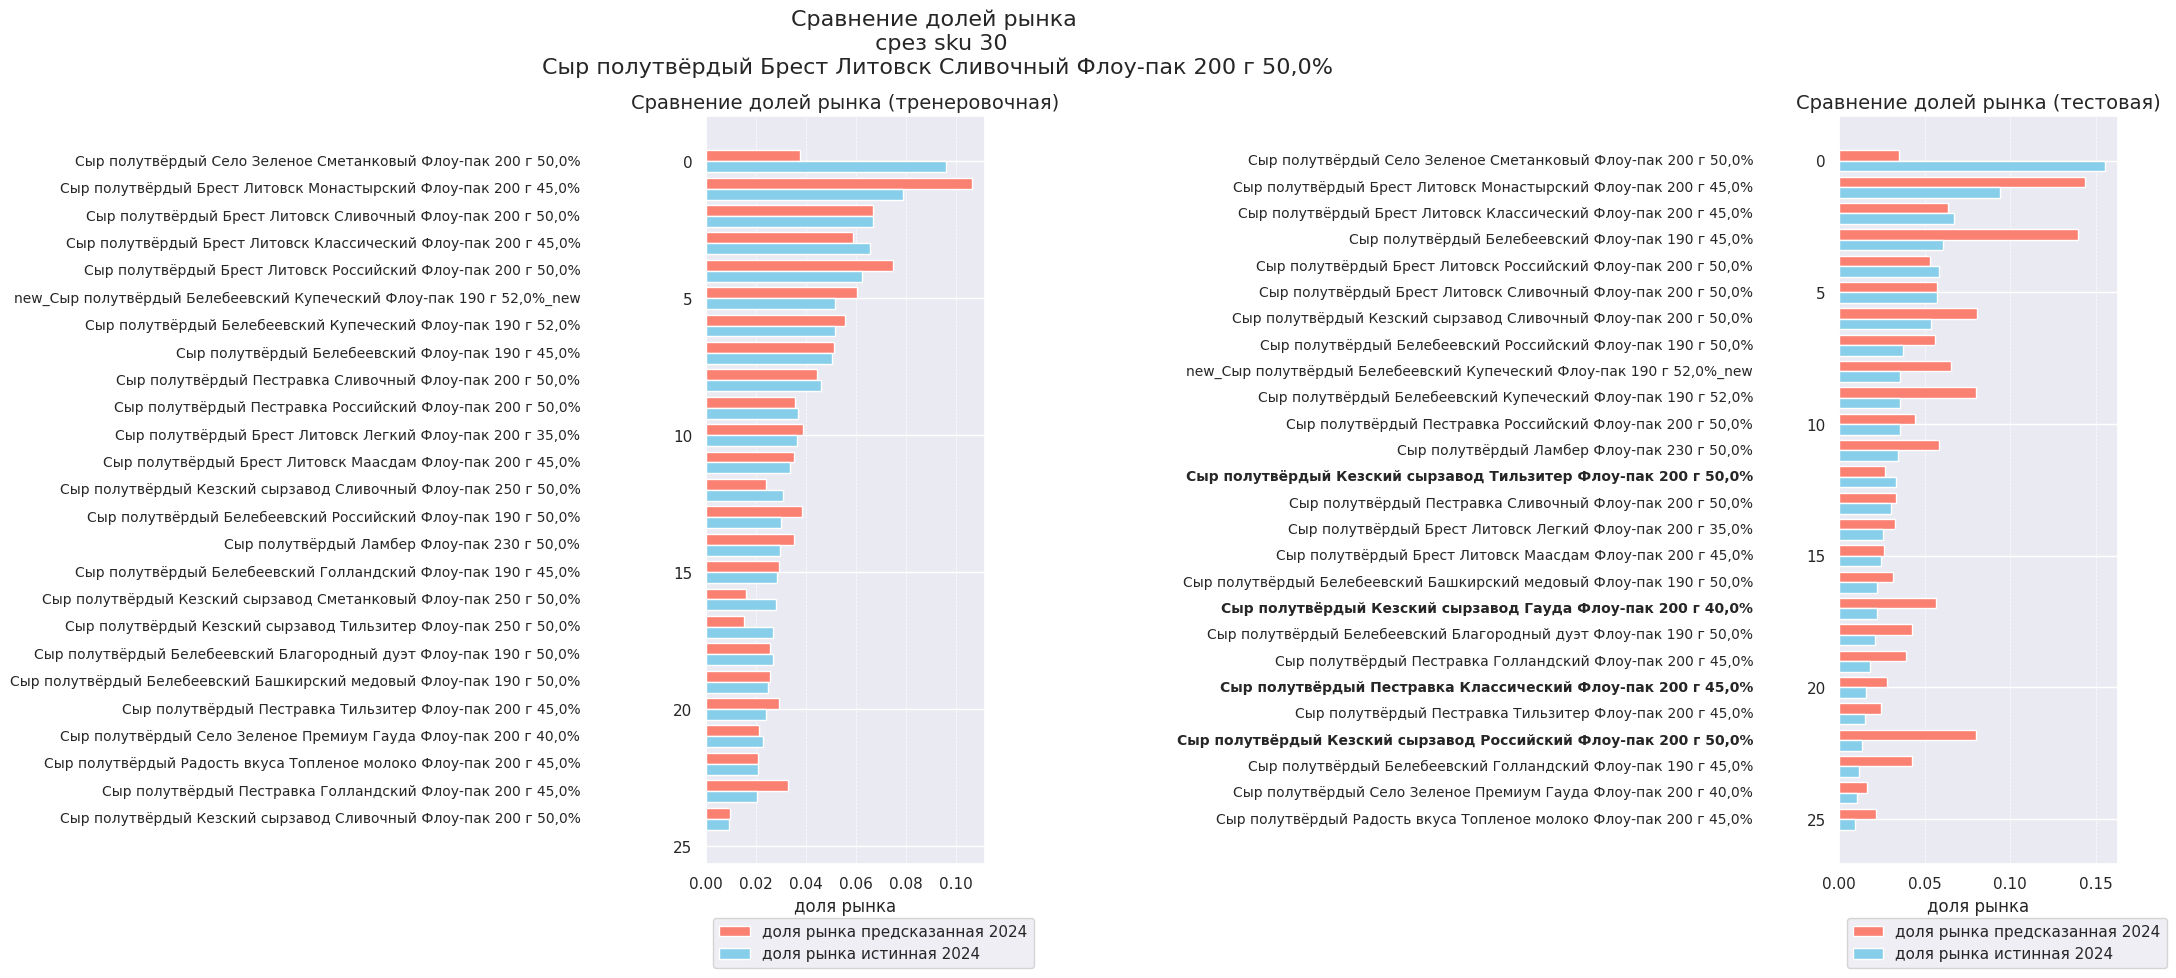

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10, bold_labels=[]):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='доля рынка предсказанная 2024')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='доля рынка истинная 2024')

    # Установка меток на оси Y с выделением жирным шрифтом
    for i, label in enumerate(filtered_labels):
        if label in bold_labels:
            ax.text(-0.05, y_pos[i], label, va='center', ha='right', fontsize=10, fontweight='bold')  # Жирный шрифт
        else:
            ax.text(-0.05, y_pos[i], label, va='center', ha='right', fontsize=10)

    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend(loc='lower left', bbox_to_anchor=(0, -0.15))  # Расположение легенды снизу слева
    ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5)

    return ax

# Извлечение данных для тренеровочной выборки
sizes_org_train = mean_org['org_market_share'].values
sizes_pred_train = true_pred.to_frame()['pred_market_share'].values
labels_org_train = mean_org.index.values

# Извлечение данных для тестовой выборки
sizes_org_test = df_test_org['org_market_share_test'].values
sizes_pred_test = df_test_pred['pred_market_share_test'].values
labels_org_test = df_test_org.index.values

top_25 = 30

# Сортировка по убыванию для тренеровочной выборки
sorted_indices_train = np.argsort(sizes_org_train)[::-1]
sizes_org_sorted_train = sizes_org_train[sorted_indices_train][:top_25]
sizes_pred_sorted_train = sizes_pred_train[sorted_indices_train][:top_25]
labels_org_sorted_train = labels_org_train[sorted_indices_train][:top_25]

# Сортировка по убыванию для тестовой выборки
sorted_indices_test = np.argsort(sizes_org_test)[::-1]
sizes_org_sorted_test = sizes_org_test[sorted_indices_test][:top_25]
sizes_pred_sorted_test = sizes_pred_test[sorted_indices_test][:top_25]
labels_org_sorted_test = labels_org_test[sorted_indices_test][:top_25]

# Построение двух диаграмм рядом
fig, axs = plt.subplots(ncols=2, figsize=(24, 10))  # Размер фигуры с двумя столбцами

# Построение диаграмм
plot_horizontal_bar_chart_with_filtered_labels(axs[0], sizes_org_sorted_train, sizes_pred_sorted_train, labels_org_sorted_train, 'Сравнение долей рынка (тренеровочная)', min_share=0.0)
plot_horizontal_bar_chart_with_filtered_labels(axs[1], sizes_org_sorted_test, sizes_pred_sorted_test, labels_org_sorted_test, 'Сравнение долей рынка (тестовая)', min_share=0.0, bold_labels=lst_new_sku_2024)

# Общий заголовок для всей фигуры
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()
